# ENGS 27 Lecture 3: Finite State Machines, Automata, Regular Languages
Instructor: Gunnar Pope  
Dartmouth College, ENGS 27 2024X  
Date: 6/23/24 

## Finite State Machines
A finite state machine (FSM) is an abstract machine that can be in one of a finite number of states at any given time. The FSM can change from one state to another in response to some inputs; the change from one state to another is called a transition. An FSM is defined by a list of its states, its initial state, and the conditions for each transition. The similest example of an FSM a deterministic finite automaton (DFA).  

### Deterministic Finite Automata (DFA)
A DFA is a 5-tuple $M=(Q, \Sigma, \delta, q0, F)$  where:
- $Q$ is a finite set of states
- $\Sigma$ is a finite set of input symbols
- $\delta$ is the transition function $\delta: Q \times \Sigma -> Q$
- $q0$ is the initial state
- $F$ is a set of final states

The transition function $\delta$ of a DFA is a function that takes a state and an input symbol and returns the next state. The DFA can only be in one state at a time.



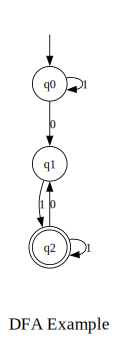

In [10]:
# Plot a simple DFA diagram using graphviz
from graphviz import Digraph
# Create a new directed graph
dot = Digraph(name='DFA Example', node_attr={'shape': 'circle'})

# Define the nodes (states)
dot.node('q0', 'q0', shape='circle')
dot.node('q1', 'q1', shape='circle')
dot.node('q2', 'q2', shape='doublecircle')  # Accept state

# Define the edges (transitions)
dot.edge('q0', 'q1', label='0')
dot.edge('q1', 'q2', label='1')
dot.edge('q2', 'q1', label='0')
dot.edge('q2', 'q2', label='1')
dot.edge('q0', 'q0', label='1')

# Add a start arrow
dot.attr('node', shape='none')
dot.node('')
dot.edge('', 'q0')

# plot the graph horizontally and center the graph

dot.attr( size='8,5', center='true')
# Render the graph
# add the title
dot.attr(label=r'\n\nDFA Example\n\n', fontsize='20')
# add more margin to the right
dot.render('dfa_example', format='png', cleanup=True)
# plot the graph inline
dot


An example of a DFA, implemented in python is shown below.

In [11]:
""" DFA Example:
    Create a DFA that accepts a string that starts with '0', ends with '0', 
    and has alternating '0' and '1' characters in between, 
    Sigma = {0, 1}
    L = {010, 01010, 0101010, ...}
"""
print("DFA Example")
states = ['q0', 'q1', 'q2']
alphabet = ['0', '1']
transition_function = {
    ('q0', '0'): 'q1',
    ('q1', '0'): 'q4',
    ('q1', '1'): 'q2',
    ('q2', '0'): 'q3',
    ('q2', '1'): 'q5',
    ('q3', '0'): 'q4',
    ('q3', '1'): 'q2',
    ('q5', '0'): 'q5', 
    ('q5', '1'): 'q5',
    ('q4', '0'): 'q4',
    ('q4', '1'): 'q4'

}
start_state = 'q0'
accept_states = ['q3']
def dfa_accepts_string(states, alphabet, transition_function, start_state, accept_states, input_string):
    current_state = start_state

    for symbol in input_string:
        if (current_state, symbol) in transition_function:
            # IMPORTANT: Here, (current_state,symbol) is a tuple!!!
            current_state = transition_function[(current_state, symbol)]
        else:
            return False

    return current_state in accept_states

# Test the DFA with different input strings
test_strings = ['010', '01010', '0101010', '0', '1', '0010', '0101', '00100']
#IMPORTANT: This is called dictionary comprehension
# There is also something called list comprehension and slicing (READ ABOUT IT)
results = {s: dfa_accepts_string(states, 
                                 alphabet, 
                                 transition_function, 
                                 start_state, 
                                 accept_states, 
                                 s) for s in test_strings}

# Display the results using pandas
import pandas as pd
df = pd.DataFrame(results.items(), columns=['String', 'Accepted'])
print(df)


DFA Example
    String  Accepted
0      010      True
1    01010      True
2  0101010      True
3        0     False
4        1     False
5     0010     False
6     0101     False
7    00100     False


## Non-deterministic Finite Automata (NFA)
An NFA is also a finite state machine, but it is not deterministic. That is, the NFA can be in multiple states at the same time.  

A NFA is also a 5-tuple $M=(Q, \Sigma, \delta, q0, F)$  where:
- $Q$ is a finite set of states
- $\Sigma$ is a finite set of input symbols
- $\delta$ is the transition function $\delta: Q \times \Sigma -> P(Q)$
- $q0$ is the initial state
- $F$ is a set of final states

Where $P(Q)$ is the power set of $Q$.

The major difference between a DFA and an NFA is that the transition function, $\delta$, of an NFA returns a set of states, $Q$, instead of a single state. This means that an NFA can be in multiple states at the same time.

The following example provides a simple implementation of an NFA for the language, $L = (0|1)^*0$.

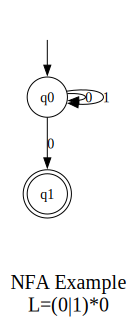

In [12]:
# Plot a simple DFA diagram using graphviz
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(name='DFA Example', node_attr={'shape': 'circle'})

# Define the nodes (states)
dot.node('q0', 'q0', shape='circle')
dot.node('q1', 'q1', shape='doublecircle')  # Accept state

# Define the edges (transitions)
dot.edge('q0', 'q0', label='0')
dot.edge('q0', 'q0', label='1')
dot.edge('q0', 'q1', label='0')

# Add a start arrow
dot.attr('node', shape='none')
dot.node('')
dot.edge('', 'q0')

# plot the graph horizontally and center the graph

dot.attr( size='8,5', center='true')
# Render the graph
# add the title
dot.attr(label=r'\n\nNFA Example\nL=(0|1)*0\n', fontsize='20')
# add more margin to the right
dot.render('dfa_example', format='png', cleanup=True)
# plot the graph inline
dot


## NFA with $\epsilon$-transitions
When the NDA accepts the empty string, the NDA can take on any state with 0 or more $\epsilon$ transitions. We call this automata $\epsilon$-NDA. This means that the NFA can transition to a new state without consuming any input.

## Example
Let's define an $\epsilon$-NFA for the language:  
$$L = 0(10)^* | 01^*0$$

## NFA Components
- $\Sigma = \{0, 1\}$
- $Q = \{q0, q1, q2, q3, q4, q5, q6\}$
- $q0$ is the initial state
- $\delta: Q \times (\Sigma \cup \{\epsilon\}) -> P(Q)$
- $F = \{q2, q5\}$

Where $P(Q)$ is the power set of $Q$ and $\epsilon$ is an empty string. The $\epsilon$-NFA diagram is rendered below.

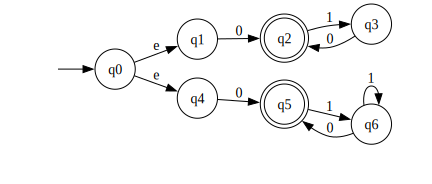

In [13]:
# Plot the e-NFA diagram for the language L = 0(10)* | 01*0
from graphviz import Digraph
dot = Digraph()

# Set graph attributes to layout left to right and center the graph
dot.attr(rankdir='LR', size='8,5', margin='0.5')

# Define the states
dot.node('q0', 'q0', shape='circle')
dot.node('q1', 'q1', shape='circle')
dot.node('q2', 'q2', shape='doublecircle')  # Accept state for 0(10)*
dot.node('q3', 'q3', shape='circle')
dot.node('q4', 'q4', shape='circle')
dot.node('q5', 'q5', shape='doublecircle')  # Accept state for 01*0
dot.node('q6', 'q6', shape='circle')

# Define the epsilon transitions
dot.edge('q0', 'q1', label='e')
dot.edge('q0', 'q4', label='e')

# Define the transitions for 0(10)*
dot.edge('q1', 'q2', label='0')
dot.edge('q2', 'q3', label='1')
dot.edge('q3', 'q2', label='0')

# Define the transitions for 01*0
dot.edge('q4', 'q5', label='0')
dot.edge('q5', 'q6', label='1')
dot.edge('q6', 'q6', label='1')
dot.edge('q6', 'q5', label='0')

# Add a start arrow
dot.attr('node', shape='none')
dot.node('')
dot.edge('', 'q0')

# Render the graph
dot.render('nfa_0_10_star_or_01_star_0', format='png', cleanup=True)
dot


Notice that the initial state, $q0$, has an $\epsilon$ transition to $q1$ and $q3$. This means that the NFA can be in multiple states at the same time.  

An example of this $\epsilon$-NFA is implemented in python below.

In [ ]:
class eNFA:
    """ Class for representing an epsilon-NFA """
    def __init__(self, states, alphabet, transitions, start_state, accept_states):
        self.states = states
        self.alphabet = alphabet
        self.transitions = transitions
        self.start_state = start_state
        self.accept_states = accept_states

    def _epsilon_closure(self, states):
        """ Returns the epsilon closure of a set of states. This means
         all states that are reachable from the initial set of states by taking
          zero or more epsilon transitions """
        closure = set(states) # start as copy of intial states
        stack = list(states) # start as copy of initial states

        while stack:
            current_state = stack.pop()
            if (current_state, '') in self.transitions: # '' is the epsilon symbol
                for next_state in self.transitions[(current_state, '')]:
                    if next_state not in closure:
                        closure.add(next_state)
                        stack.append(next_state)
        return closure

    def _move(self, states, symbol):
        """ Returns the set of states to which there is a transition on symbol from any state in states """
        next_states = set()
        for state in states:
            if (state, symbol) in self.transitions:
                next_states.update(self.transitions[(state, symbol)])
        return next_states

    def accepts(self, input_string):
        current_states = self._epsilon_closure([self.start_state])

        for symbol in input_string:
            current_states = self._move(current_states, symbol)
            current_states = self._epsilon_closure(current_states)

        return any(state in self.accept_states for state in current_states) # Uses a generator (brackets) rather than a list commprehension (square brackets) because it is more memory efficient


# Define the NFA components for the language L = 0(10)* | 01*0
states = {'q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6'}
alphabet = {'0', '1'}
transitions = {
    ('q0', ''): {'q1', 'q4'},
    ('q1', '0'): {'q2'},
    ('q2', '1'): {'q3'},
    ('q3', '0'): {'q2'},
    ('q4', '0'): {'q5'},
    ('q5', '1'): {'q6'},
    ('q6', '1'): {'q6'},
    ('q6', '0'): {'q5'},
}
start_state = 'q0'
accept_states = {'q2', 'q5'}

nfa = eNFA(states, alphabet, transitions, start_state, accept_states)

# Test the NFA with different input strings
test_strings = ['0', '010', '0110', '01010','01110', '0101', '011', '01', '0010', '1', '101']
results = {s: nfa.accepts(s) for s in test_strings}

# Display the results
import pandas as pd
df = pd.DataFrame(results.items(), columns=['String', 'Accepted'])
print(df)


   String  Accepted
0       0      True
1     010      True
2    0110      True
3   01010      True
4   01110      True
5    0101     False
6     011     False
7      01     False
8    0010     False
9       1     False
10    101     False


# Regular Languages
A regular language is a formal language that can be expressed using a regular expression. A regular expression is a sequence of characters that define a search pattern. Regular languages can be recognized by finite automata, such as DFAs and NFAs.

# Regular Expressions
A regular expression is a sequence of characters that define a search pattern. Regular expressions are used to search for patterns in strings and are used in many programming languages and text editors to search and manipulate text.

Some common regular expression patterns include:
- a.b: Matches "a" followed by any character followed by "b".
- ^abc: Matches any string that starts with "abc".
- abc$: Matches any string that ends with "abc".
- a*: Matches zero or more "a"s.
- (ab)+: Matches one or more "ab"s, {'ab', 'abab', ...}.
- a?: Matches zero or one a.
- a{2,4}: Matches between 2 and 4 "a"s.
- [a-z]: Matches any lowercase letter.
- [^0-9]: Matches any character that is not a digit.
- \d{3}: Matches exactly three digits.
- (abc|def): Matches abc or def.

# Examples
Let's define a regular expression for the language:  
 - A regular expression for float numbers in the form of $[+-]?[0-9]^*.[0-9]+([eE][+-]?[0-9]+)?$
 - A regular expression for a date in the form of $[0-9]\{4\}-[0-9]\{2\}-[0-9]\{2\}$
 - A regular expression for a phone number in the form of $[0-9]\{3\}-[0-9]\{3\}-[0-9]\{4\}$

# References:
- [Wikipedia - Finite State Machine](https://en.wikipedia.org/wiki/Finite-state_machine)
- [ChatGPT4.o](https://chat.openai.com/)
- [Github Copilot](https://github.com/features/copilot)